<a href="https://colab.research.google.com/github/Saeed-upm/Selected-Topics-in-Financial-Mathematics/blob/main/Selected_Topics_in_Financial_math_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## مدل درخت دو جمله ای برای قیمت گذاری اختیارهای معامله

## مدل دو جمله ای

In [ ]:
def binomialCall(s,x,T,r,sigma,n=100):
    deltaT = T /n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1.0 / u
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i + 1)] for i in range(n + 1)]
    for i in range(n-1, -1, -1):
      for j in range(i+1):
        v[n][j] = max(s * u**j * d**(n - j) - x, 0.0)
    for i in range(n-1, -1, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    return v[0][0]

In [ ]:
binomialCall(40,42,0.5,0.1,0.2,2000)

2.2778884612520476

## روش مونت کارلو

## محاسبه تقریبی عدد $\pi$

In [ ]:
import numpy as np
n=4000
x=np.random.uniform(low=0,high=1,size=n)
y=np.random.uniform(low=0,high=1,size=n)
dist=np.sqrt(x**2+y**2)
in_circle=dist[dist<=1]
our_pi=len(in_circle)*4./n
print ('pi=',our_pi)

pi= 3.135


In [ ]:
print(len(in_circle))

3135


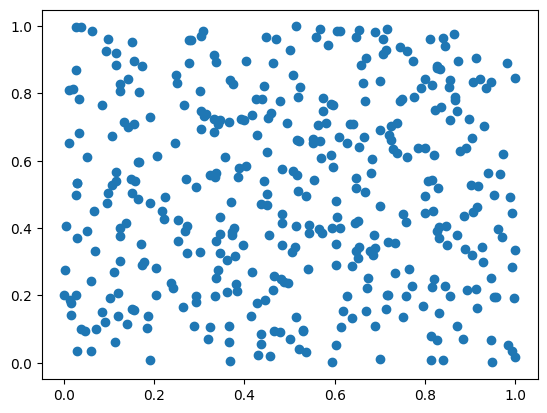

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

## شبیه سازی قیمت سهام

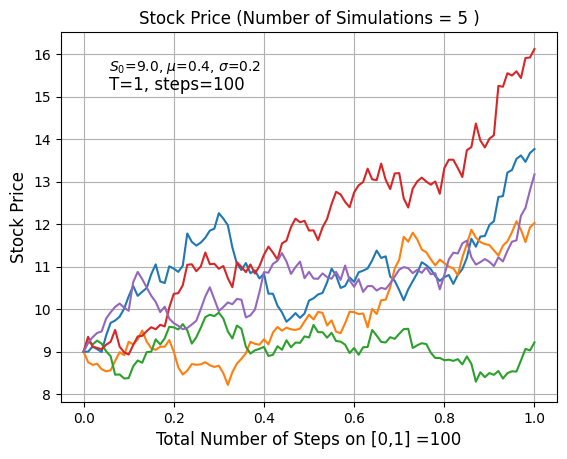

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
stock_price_today = 9 # stock price at time zero
T =1 # maturity date (in years)
n_steps = 100 # number of steps
mu =0.4 # expected annual return
sigma = 0.2 # volatility (annualized)
np.random.seed(12345) # seed()
n_simulation = 5 # number of simulations
dt =T/n_steps
S = np.zeros(n_steps+1)
x = np.arange(0, n_steps+1, 1)
for j in np.arange(0, n_simulation):
    S[0]= stock_price_today
    for i in x[:-1]:
        e=np.random.normal()
        S[i+1]=S[i]+S[i]*(mu-0.5*sigma**2)*dt+sigma*S[i]*np.sqrt(dt)*e;
    plt.plot(x/100, S)
plt.figtext(0.2,0.8,'$S_0$='+str(S[0])+', $\mu$='+str(mu)+', $\sigma$='+str(sigma), fontsize=10)
plt.figtext(0.2,0.76,'T='+str(T)+', steps='+str(int(n_steps)), fontsize=12)
plt.title('Stock Price (Number of Simulations = %d ' % n_simulation +')', fontsize=12)
plt.xlabel('Total Number of Steps on [0,1] ='+str(int(n_steps)), fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.grid()
plt.show()

## قیمت گذاری اختیار خرید اروپایی با استفاده از شبیه سازی مونت کارلو

In [ ]:
import numpy as np
S0 = 40. # stock price at time zero
K =   40. # exercise price
T = 0.5 # years
r = 0.05 # risk-free rate
sigma = 0.2 # volatility (annual)
n_steps = 100          # number of steps
np.random.seed(12345) # fix those random numbers
n_simulation = 5000   # number of simulation
dt = T/n_steps
call = np.zeros([n_simulation], dtype=float)
x = range(0, n_steps, 1)
for j in range(0, n_simulation):
    sT=S0
    for i in x[:-1]:
      e=np.random.normal()
      sT=sT*np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
    call[j]=max(sT-K,0)
call_price=np.mean(call)*np.exp(-r*T)
print ('call price = ', round(call_price,8))

call price =  2.7482567


## قیمت گذاری اختیار معامله خرید آسیایی با استفاده از شبیه سازی مونت کارلو

The payoff function of an Asian call (average price) is given as follows:

$payoff (call)= \max(S_{Average}-K,0)$

In [ ]:
import numpy as np
S0 = 40. # stock price at time zero
K =   40. # exercise price
T = 0.5 # years
r = 0.05 # risk-free rate
sigma = 0.2 # volatility (annual)
n_steps = 100          # number of steps
np.random.seed(12345) # fix those random numbers
n_simulation = 5000   # number of simulation
dt = T/n_steps
call = np.zeros([n_simulation], dtype=float)
x = range(0, int(n_steps), 1)
for j in range(0, n_simulation):
    sT=S0
    prices_sum = S0
    for i in x[:-1]:
      e=np.random.normal()
      sT=sT*np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
      prices_sum = prices_sum + sT
    price_average = prices_sum/n_steps
    call[j]=max(price_average-K,0)
call_price=np.mean(call)*np.exp(-r*T)
print ('call price = ', round(call_price,8))

call price =  1.54285636


## Pricing barrier options using the Monte Carlo simulation

## قیمت گذاری اختیار معامله مانع با استفاده از شبیه سازی مونت کارلو
The four types of barrier options are given as follows:



*   **Up-and-out:** In this barrier option, the price starts from below a barrier level. If it reaches the barrier, it is knocked out.
*   **Down-and-out:** In this barrier option, the price starts from above a barrier. If it reaches the barrier, it is knocked out.
*   **Up-and-in:** In this barrier option, the price starts below a barrier and has to reach the barrier to be activated.
*   **Down-and-in:** In this barrier option, the price starts above a barrier and has to reach the barrier to be activated.

## The following Python program is for an up-and-out barrier option with a European call:

In [ ]:
def bs_call(S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+sigma*sigma/2.)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return S*stats.norm.cdf(d1)-K*np.exp(-r*T)*stats.norm.cdf(d2)

In [ ]:
def up_and_out_call(s0,K,T,r,sigma,n_simulation,barrier):
    n_steps=100
    dt=T/n_steps
    total=0
    for j in range(0, n_simulation):
        sT=s0
        out=False
        for i in range(0,n_steps):
            e=np.random.normal()
            sT*=np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
            if sT>barrier:
                out=True
        if out==False:
            total=total+bs_call(s0,K,T,r,sigma)
    return total/n_simulation

In [ ]:
from scipy import stats
import numpy as np
s0=40.           # today stock price
K=40.            # exercise price
barrier=42     # barrier level
T=0.5            # maturity in years
r=0.05           # risk-free rate
sigma=0.2        # volatility (annualized)
n_simulation=5000 # number of simulations
result=up_and_out_call(s0,K,T,r,sigma,n_simulation,barrier)
print ('up-and-out-call = ', round(result,2))
print('black scholes call = ', round(bs_call(s0,K,T,r,sigma),2))

up-and-out-call =  0.75
black scholes call =  2.76


## The Python code for the down-and-in put option is shown as follows:

In [ ]:
def bs_put(S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+sigma**2/2.)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    return K*np.exp(-r*T)*stats.norm.cdf(-d2)-S*stats.norm.cdf(-d1)

In [ ]:
def down_and_in_put(s0,K,T,r,sigma,n_simulation,barrier):
    n_steps=100
    dt=T/n_steps
    total=0
    for j in range(0, n_simulation):
        sT=s0
        in_=False
        for i in range(0,n_steps):
            e=np.random.normal()
            sT=sT*np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
            if sT<barrier:
              in_=True
        if in_==True:
            total=total+bs_put(s0,K,T,r,sigma)
    return total/n_simulation

In [ ]:
from scipy import stats
import numpy as np
s0=42.           # today stock price
K=40.            # exercise price
barrier=40      # barrier level
T=0.5            # maturity in years
r=0.05           # risk-free rate
sigma=0.2        # volatility (annualized)
n_simulation=1000 # number of simulations
result = down_and_in_put(s0,K,T,r,sigma,n_simulation,barrier)
print ('down-and-in-put = ', round(result,3))
print('black scholes put = ', round(bs_put(s0,K,T,r,sigma),2))

down-and-in-put =  0.726
black scholes put =  1.09


## Pricing lookback options with floating strikes
## قیمت گذاری اختیارهای معامله پس نگر با استفاده از شبیه سازی مونت کارلو

**The payoff function of a call when the exercise price is the minimum price achieved during the life of the option is given as follows:**


$Payoff =\max(S_T-S_\min,0)=S_T-S_\min$

In [ ]:
def lookback_min_price_as_strike(s,T,r,sigma,n_simulation):
    n_steps=100
    dt=T/n_steps
    total=0
    for j in range(n_simulation):
        min_price=100000.   # a very big number
        sT=s
        for i in range(n_steps):
            e=np.random.normal()
            sT=sT*np.exp((r-0.5*sigma**2)*dt+sigma*e*np.sqrt(dt))
            if sT<min_price:
              min_price=sT
        total=total+bs_call(s,min_price,T,r,sigma)
        print('S_T = ', sT)
        print('S_min = ', min_price)
    return total/n_simulation

In [ ]:
import numpy as np
from scipy import stats
s=40.# today stock price
T=0.5# maturity in years
r=0.05 # risk-free rate
sigma=0.2 # volatility (annualized)
n_simulation=15 # number of simulations
result=lookback_min_price_as_strike(s,T,r,sigma,n_simulation)
print ('lookback min price as strike = ', round(result,3))

S_T =  42.12174218534782
S_min =  36.47898786246824
S_T =  33.04891943812561
S_min =  30.636586992931317
S_T =  43.90694050151172
S_min =  38.24248945796641
S_T =  44.0163549414634
S_min =  35.46617628894059
S_T =  54.03303766812344
S_min =  38.764029937783654
S_T =  48.05573327476638
S_min =  38.987126006760626
S_T =  47.810170089594656
S_min =  39.801490943409455
S_T =  47.462219298523046
S_min =  39.99985213989118
S_T =  32.84994982271056
S_min =  32.10345651499907
S_T =  37.941960948362095
S_min =  33.59324704661392
S_T =  49.80808080231315
S_min =  40.02222979511923
S_T =  37.793932639692244
S_min =  35.64631702500798
S_T =  42.4436442241131
S_min =  33.06406711280533
S_T =  35.57834996201604
S_min =  33.74160287010632
S_T =  36.54445941001855
S_min =  32.96757145788339
lookback min price as strike =  5.666
